<a href="https://colab.research.google.com/github/gabrielnd312/airbnb_data/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_T%C3%B3quio_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### *Gabriel Duarte*

---
<left><img alt="japan_banner" width="60%" src="https://images.unsplash.com/photo-1604928141064-207cea6f571f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1228&q=80"></left>

# Análise de Dados do Airbnb - *Tóquio - Japão*

Atualmente, o Airbnb é reconhecido como a empresa líder no setor de hospedagem, embora seja importante observar que **não possui nenhum estabelecimento hoteleiro.**

Por meio da criação de uma plataforma **inovadora**, o Airbnb conecta pessoas que desejam viajar e se hospedar com anfitriões que desejam alugar suas propriedades de forma prática, oferecendo uma alternativa de hospedagem.

Desde sua fundação, há mais de 10 anos, a startup já hospedou **mais de 300 milhões de pessoas em todo o mundo** até o final de 2018, desafiando os modelos tradicionais de redes hoteleiras.

Como parte de suas iniciativas, o Airbnb disponibiliza dados de algumas das principais cidades do mundo. Através do portal **[Inside Airbnb](https://http://insideairbnb.com/get-the-data/)**, é possível obter uma grande variedade de dados para **desenvolver projetos e soluções em ciência de dados.**

<left><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></left>

**Neste *caderno*, analisaremos os dados da cidade de Tóquio e veremos quais insights podem ser extraídos desses dados.**



---



<left><img alt="Tk/Jp" width="70%" src="https://images.unsplash.com/photo-1513407030348-c983a97b98d8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1172&q=80"></left>

Este projeto de ciência de dados visa explorar e analisar dados reais do Airbnb em **Tóquio, Japão** com base em conjuntos de dados fornecidos pelo portal Inside Airbnb. Tóquio, a capital do Japão, é uma cidade dinâmica repleta de **cultura**, **história** e uma **experiência turística única**.

Tóquio é uma das **cidades mais visitadas do mundo**, atraindo milhões de turistas. Com sua rica cultura, arquitetura moderna, comida deliciosa, festivais vibrantes e uma infinidade de atrações turísticas, a cidade oferece uma experiência emocionante para os visitantes.

Neste projeto, usaremos técnicas de programação **data science** e **Python** para explorar, visualizar e analisar esses dados a fim de obter uma compreensão mais profunda do mercado.

Espero que este projeto forneça informações úteis para qualquer pessoa interessada em visitar ou ficar em *Tóquio*, bem como para entusiastas de ciência e análise de dados.

## Obtenção dos Dados

Os dados utilizados neste projeto foram obtidos através do portal [Inside Airbnb](https://insideairbnb.com/get-the-data/), que contém uma compilação de dados disponibilizados pela própria plataforma Airbnb.

Para realizar a análise inicial deste projeto, utilizamos o seguinte arquivo disponibilizado no site:

listings.csv: Informações resumidas relacionada a cidade de Tóquio.

Tendo isso em mente, vamos prosseguir com a análise.


In [27]:
# Inicialmente - Importamos os pacotes necessários.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [3]:
# Importamos para um DataFrame o arquivo selecionado.
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2023-03-31/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id -> Código identificador da hospedagem/imóvel.
* name -> Nome da propriedade.
* host_id -> Id do anfitrião que anunciou a propriedade.
* host_name -> Nome do anfitrião
* neighbourhood_group -> Sem valores a considerar nesta coluna.
* neighbourhood -> Nome do bairro no qual a propriedade está localizada.
* latitude -> Coordenada da latitude do imóvel.
* longitude -> Coordenada da longitude do imóvel.
* room_type -> Tipo de hospedagem oferecido no anúncio.
* price -> Preço da hospedagem
* minimun_nights -> Mínimo de noites que o local oferece.
* number_of_reviews -> Números de avaliações da hospedagem.
* last_review -> Última avaliação.
* reviews_per_month -> Avaliações/reviews recebidas por mês.
* calculated_host_listings_count -> Quantidade de anúncios listados do mesmo anfitrião.
* availability_365 -> Quantidade de dias disponíveis em um intervalo de 365 dias.
* number_of_reviews_ltm -> "ltm" faz referência aos últimos doze meses. Então número de avaliações nos últimos doze meses.
* license -> Número de licença.










Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,170,2023-03-05,1.21,1,0,5,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,8336,3,235,2023-03-07,1.87,1,109,7,M130000243
2,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.65800,139.67134,Private room,16026,1,233,2023-03-20,1.92,1,79,22,M130001107
3,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,40000,2,95,2020-03-17,0.81,1,88,0,M130007760
4,1249571,Unique stay! New&1min to the subway,6809418,Yume,NaN,Shibuya Ku,35.65111,139.72165,Entire home/apt,50392,7,114,2023-03-15,0.98,1,212,11,M130000957


### Atributos (variáveis) e entradas o nosso conjunto de dados possui.
**Identificamos também os tipos dessas variáveis.**

In [5]:
# Identificação do volume de dados do DataFrame

print("Entradas:".format(df.shape[0]))
print("Variávels:\t{}\n".format(df.shape[1]))

# Verificamos as 5 primeiras entradas do Dataset
df.dtypes

Entradas:
Variávels:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Identifica-se então **10127 linhas** e **18 colunas**.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# Somamos e ordenamos os valores de acordo com os valores ausentes em cada uma das variáveis.
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               10127
reviews_per_month                  1095
last_review                        1095
license                              26
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
name                                  0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_name                             0
host_id                               0
price                                 0
dtype: int64

Dessa maneira é possível identificar que o conjunto com o **maior número de valores ausentes** é a variável **"neighbourhood_group"** com um total de 10127 valores ausentes. Seguido por **"reviews_per_month"**, **"last_review"** e **"license"**.

Podemos identificar então, de acordo com o tamanho do nosso Dataset (de **10127** entradas) que esta primeira variável não possui nenhum valor válido.

**Os demais conjuntos não possuem valores ausentes.**

<center><img alt="Tk/Jp" width="30%" src="https://images.unsplash.com/photo-1601042879364-f3947d3f9c16?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=387&q=80"></center>


In [7]:
#Calculamos a porcentagem de valores ausentes em cada um dos conjuntos.
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

neighbourhood_group               100.000000
reviews_per_month                  10.812679
last_review                        10.812679
license                             0.256739
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Os conjuntos que possuem valores ausentes são apenas os 4 primeiros. Sendo distribuidos da seguinte forma (em porcentagem):

**neighbourhood_group** - *100%*


---


**reviews_per_month** - *11%*


---


**last_review** - *11%*


---


**license** -  *0.25%*


### **Q3. Qual o tipo de distribuição das variáveis?** 

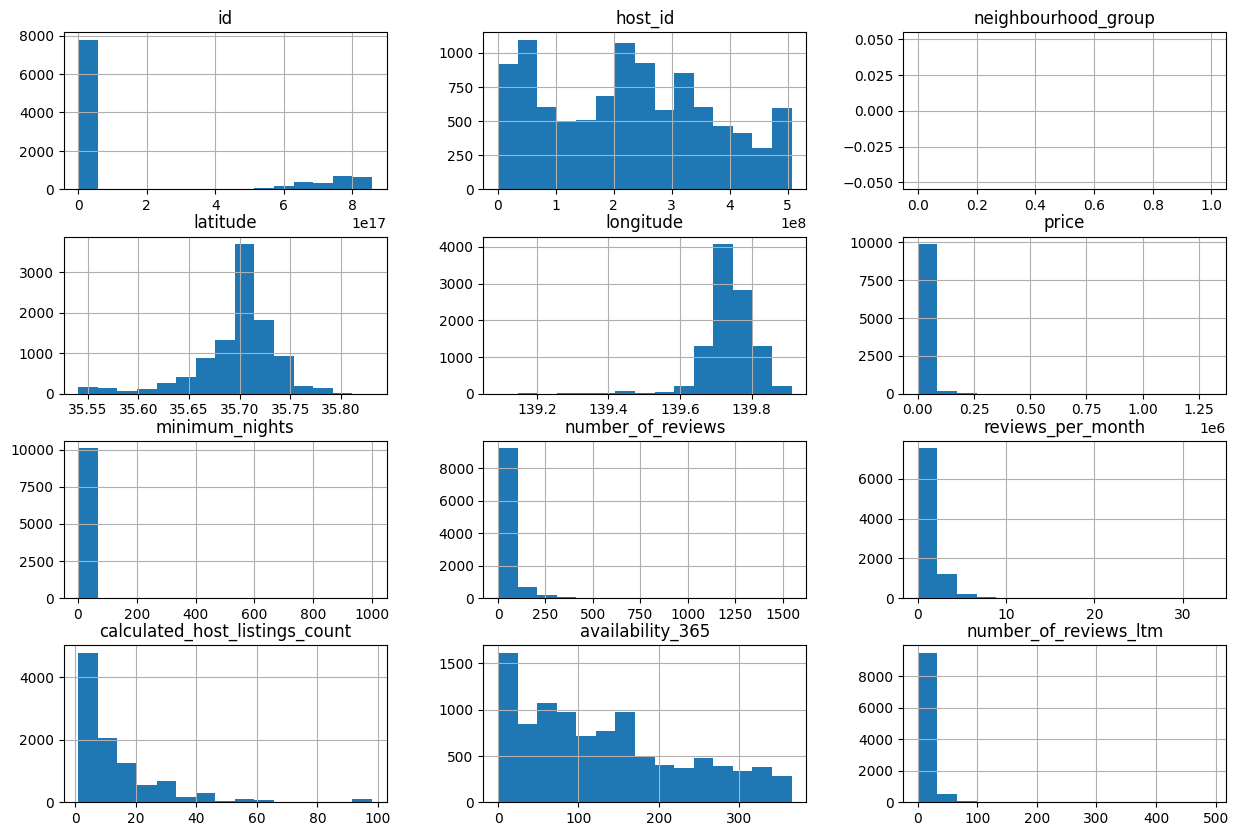

In [8]:
# Para melhor visualização, plotamos o histograma de variáveis.
df.hist(bins = 15, figsize = (15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
#Sem considerar o impacto de outliers, extraímos a média de preços dos anúncios através da coluna ["price"]
print("A média dos preços das hospedagens é de:", round(df["price"].mean()),"ienes")
print("Isso é equivalente a", round(df["price"].mean() / 139.53),"dólares.")



A média dos preços das hospedagens é de: 26342 ienes
Isso é equivalente a 189 dólares.


<left><img alt="Tk/Jp" width="60%" src="https://images.unsplash.com/photo-1551641506-ee5bf4cb45f1?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1184&q=80"></left>

**Cotação utilizada de ¥139 para $1,00.**

*Dia 05/06/2023*

### **Conversão de valores**

Para evitar problemas em nossa análise, convertemos os valores de Ienes para Dólares e anexamos na nova coluna **["price_usd"]**

- Cotação utilizada informada acima.

In [10]:
#Converter e criar a nova coluna em valores em dólar.
cotacao = 139
df["price_usd"] = round(df["price"] / cotacao)
df[["price", "price_usd"]]

,price,price_usd
0,11000,79.0
1,8336,60.0
2,16026,115.0
3,40000,288.0
4,50392,363.0
...,...,...
10122,68000,489.0
10123,10037,72.0
10124,18918,136.0
10125,38857,280.0


###**Outliers**

Pela forma como os resultados do histograma foram apresentados, é possível presumir a presença de *outliers* nos dados considerados.

Por exemplo, a variação nas colunas `price` e `minimum_nights`

Os valores não seguem uma distribuição uniforme, e distorcem toda a representação gráfica com alguns valores extramamente altos, que afetam nossa média. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. 

Utilizamos:

* Resumo estatístico por meio do método `describe()`
* Plotar gráficos `boxplots` para a variável.

In [11]:
#Verificar o resumo estatístico das variáveis númericas
df[["price_usd","minimum_nights","availability_365"]].describe()

,price_usd,minimum_nights,availability_365
count,10127.000000,10127.000000,10127.000000
mean,189.506468,2.587045,132.510911
std,366.455533,13.319821,101.594966
min,0.000000,1.000000,0.000000
25%,81.500000,1.000000,50.000000
50%,131.000000,1.000000,116.000000
75%,214.000000,2.000000,202.000000
max,9399.000000,1000.000000,365.000000


 Ao olhar o resumo estatístico, imediatamente é possível verificar algumas possíveis inconsistências com valores, indicando números fora da realidade e/ou incorretos.

 O que levaria a uma **análise comprometida** caso considerado:


---


 Os valores de hospedagem em **[price_usd]** -> A média é de **189 dólares**, sendo que **75% dos dados estão abaixo de U$ 214**. 
 
 
 Porém, no dataset é indicado valores de até **U$ 9399 por noite**. Sabemos que este não é um padrão que se repete com frequência no dataset, e considerá-lo apenas elevaria as demais médias, desviando os dados da demonstração da realidade.



---
Os valores indicados em **[minimum_nights]** -> *75%* dos dados no dataset indicam que o **número mínimo de noites para se hospedar é de até 2 noites**. Como valor máximo, reparamos que é possível chegar ao número de **1.000 noites** mínimas, o que seria mais de 2 anos de estadia mínima.

Para um serviço como Airbnb *(e até como contrato de aluguel normal)* sabemos que este valor não corresponde a realidade, e também pode elevar nossa média para cima se considerado na análise como valor real.


---



###**Boxplot**

Para uma melhor visualização dos Outliers e seus efeitos em nossa análise utilizamos o Boxplot na ordem abaixo:

Boxplot para a coluna **[price_usd]**:



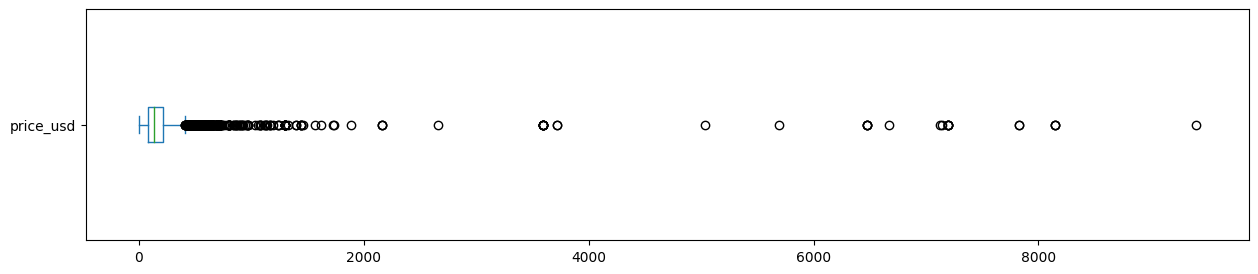

Valores acima de 600 dólares:
277 entradas.
Porcentagem de entradas acima de 600 dólares: 2.7353%
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Valores acima de 800 dólares:
97 entradas.
Porcentagem de entradas acima de 800 dólares: 0.9578%


In [12]:
#Código para gráfico boxplot [price_usd]
df.price_usd.plot(kind="box", vert = False, figsize = (15 , 3))
plt.show()

#Verificar hospedagens com preço mínimo acima de 600 dólares:
print("Valores acima de 600 dólares:")
print("{} entradas.".format(len(df[df.price_usd > 600])))
print("Porcentagem de entradas acima de 600 dólares: {:.4f}%".format((len(df[df.price_usd > 600]) / df.shape[0]) * 100))

print("-=" * 30)

#Verificar hospedagens com preço mínimo acima de 800 dólares:
print("Valores acima de 800 dólares:")
print("{} entradas.".format(len(df[df.price_usd > 800])))
print("Porcentagem de entradas acima de 800 dólares: {:.4f}%".format((len(df[df.price_usd > 800]) / df.shape[0]) * 100))

Inicialmente o ponto de corte foi colocado em **U$ 600,00** por noite, porém, a representação deste valor em nosso dataset ultrapassa **2.7%** das entradas com **277 hospedagens.**

Levando sua relevância em consideração, foi alterado o corte para hospedagens acima de **U$ 800,00** por noite, havendo apenas **97** entradas representando menos de **1%** em nosso dataset.

Seguindo na análise,

Plotamos o Boxplot para a coluna **[minimum_nights]**:

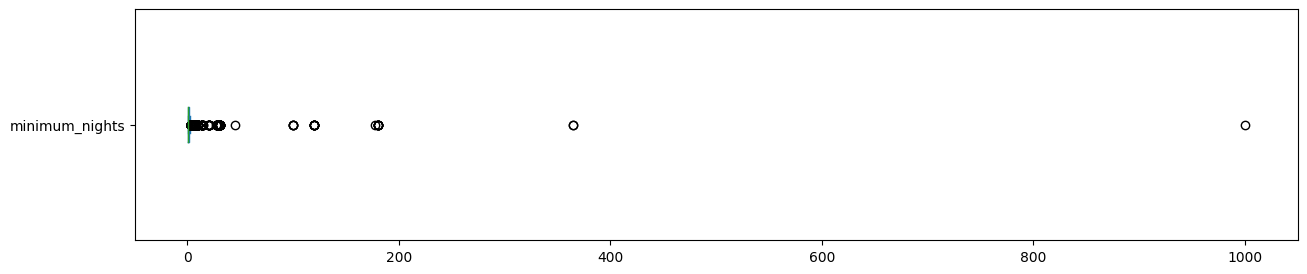

minimum_nights -> Valores acima de 30 dias:
34 entradas.
Porcentagem de entradas acima de 30 dias: 0.3357%


In [13]:
#Código para gráfico boxplot [price_usd]
df.minimum_nights.plot(kind = "box", vert = False, figsize = (15 , 3))
plt.show()

#Verificar hospedagens com data mínima de hospedagem acima de 30 dias:
print("minimum_nights -> Valores acima de 30 dias:")
print("{} entradas.".format(len(df[df.minimum_nights > 30])))
print("Porcentagem de entradas acima de 30 dias: {:.4f}%".format((len(df[df.minimum_nights>30]) / df.shape[0]) * 100))

##**Histogramas sem Outliers**

Conforme análise realizada nas colunas identificadas acima *([price_usd] e [minimum_nights])*, foi demonstrada a presença relevante de Outliers, suficiente para desviar a análise da realidade.

Abaixo limpamos o DataFrame para realizar uma nova análise de seus histogramas e verificar os efeitos anteriores dos Outliers.

In [14]:
#Criação do DataFrame.clean() removendo os Outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price_usd > 800].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30]. index, axis =0, inplace = True)

Anteriormente identificamos que a coluna **[neighbourhood_group]** está completamente vazia. Por isso não será útil em nossa análise. 

Também realizamos a remoção da coluna original **[price]** para que não confunda com a nova coluna de valores convertidos e limpos de Outliers.

Segue a remoção abaixo:

In [15]:
df_clean.drop("neighbourhood_group", axis = 1, inplace = True)
df_clean.drop("price", axis = 1, inplace = True)

##**Finalmente, plotamos os histogramas após realizada a limpeza.**

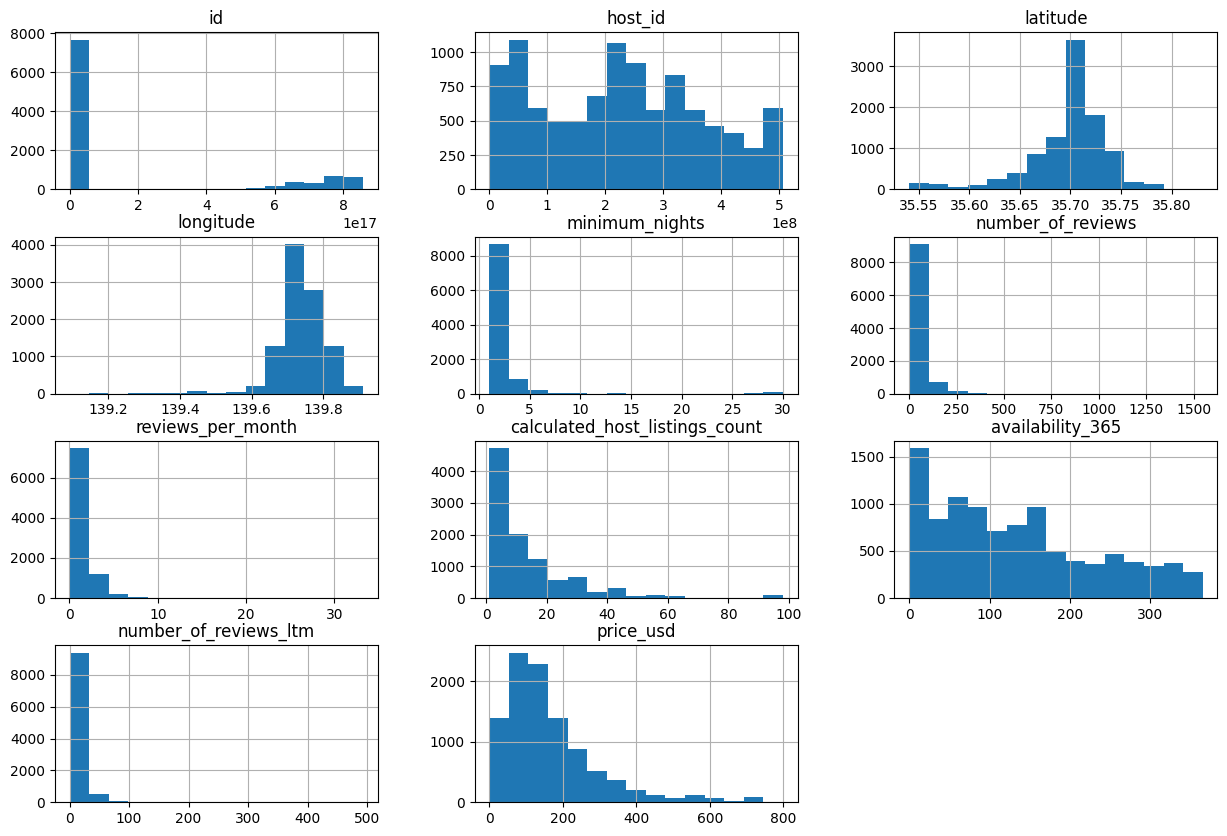

In [16]:
df_clean.hist(bins = 15, figsize = (15, 10));

### **Q4. Qual a correlação existente entre as variáveis**

In [17]:
# Criação da matriz de correlação
corr = df_clean[["price_usd", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr()

# Apresentação da matriz de correlação
display(corr)

,price_usd,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price_usd,1.000000,-0.052827,0.000668,0.088780,-0.027273,0.138775
minimum_nights,-0.052827,1.000000,-0.055516,-0.098298,-0.059021,0.003062
number_of_reviews,0.000668,-0.055516,1.000000,0.568077,-0.164397,-0.068320
reviews_per_month,0.088780,-0.098298,0.568077,1.000000,-0.061893,0.044116
calculated_host_listings_count,-0.027273,-0.059021,-0.164397,-0.061893,1.000000,0.132534
availability_365,0.138775,0.003062,-0.068320,0.044116,0.132534,1.000000


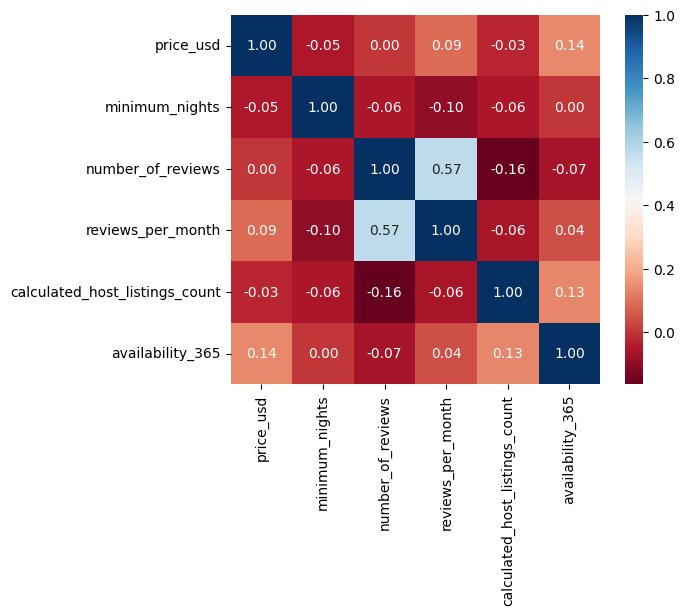

In [18]:
# Apresentação de um Heat Map das correlações
sns.heatmap(corr, cmap = "RdBu", fmt = ".2f", square = True, linecolor = "white", annot = True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Em nosso dataset a coluna que indica o tipo de quarto para alugar é a [room_type];

No Airbnb você possui diversas opções acomodações como casa/apartamento inteiro, quarto inteiro, quarto para dividir com outros hóspedes e mais.

In [19]:
# Abaixo vemos a quantidade total de cada tipo de imóvel disponível
df_clean.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    7022
Private room       2438
Hotel room          298
Shared room         250
Name: room_type, dtype: int64

In [20]:
# Porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] *100

Entire home/apt    70.163869
Private room       24.360512
Hotel room          2.977618
Shared room         2.498002
Name: room_type, dtype: float64

<left><img alt="Tk/Jp" width="30%" src="https://images.unsplash.com/photo-1609770231080-e321deccc34c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=465&q=80"></left>

Logo, identificamos que o tipo de imóvel mais alugado é **Apartamento Inteiro / Casa Inteira.**

### **Q6. Qual a localidade mais cara do dataset?**

Para identificamos essa informação com maior precisão e agilidade podemos utilizar o *groupby ()*.

Dessa forma, podemos realizar nossa análise de preços a partir da localização da hospedagem.

In [21]:
# Identificação de preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price_usd.mean().sort_values(ascending = False) [:10]

neighbourhood
Kodaira Shi     243.250000
Shibuya Ku      214.130137
Minato Ku       213.104839
Shinjuku Ku     211.068932
Chiyoda Ku      194.590604
Chuo Ku         185.846154
Komae Shi       170.166667
Taito Ku        164.617745
Shinagawa Ku    161.133721
Nakano Ku       157.109589
Name: price_usd, dtype: float64

In [22]:
#Checagem de imóveis no bairro, para verificar a veracidade da média dentro dos preços reais.
print(df_clean[df_clean.neighbourhood == "Kodaira Shi"].shape)

#Ver entradas
df_clean[df_clean.neighbourhood == "Kodaira Shi"]

(4, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_usd
84,6785470,DOMUS MUSASHINO -Sakura View-,35525878,Kanako,Kodaira Shi,35.72576,139.50954,Entire home/apt,5,59,2020-03-31,0.64,1,37,0,M130000194,37.0
744,19663983,Musicians friendly!! with 2 Pianos＆Soundproof-...,10969488,Como,Kodaira Shi,35.71053,139.47909,Private room,1,5,2023-02-21,0.10,4,255,3,M130002755,48.0
3162,35642370,東京都一橋学園 歡迎寵物·嬰兒·免收費,267850163,Mi,Kodaira Shi,35.72686,139.47679,Private room,1,11,2021-12-23,0.25,1,149,0,M130017378,528.0
3182,35696314,10 min. from Sta.：3駅（国分寺・西国分寺・恋ヶ窪）可能！wi-fi完備の静...,64271981,Osamu,Kodaira Shi,35.71629,139.46960,Private room,1,10,2020-02-08,0.22,1,87,0,M130017495,360.0


Observamos que apesar dos valores médios refletirem essa disposição dos bairros por valor de hospedagem, o primeiro **"Kodaira Shi"** apresenta apenas **4 entradas** contra **+500** do segundo bairro **"Shibuya Ku"**.

Por isso é preciso estar atento ao contexto local para identificar se os dados filtrados representam a realidade da região.

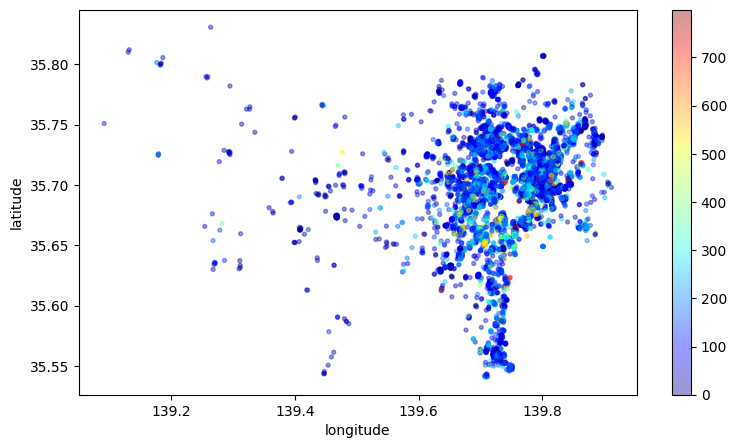

In [23]:
# Imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x="longitude", y="latitude", alpha = 0.4, c=df_clean["price_usd"], s=8,
              cmap=plt.get_cmap("jet"), figsize = (9,5));

#**Mapa interativo usando Folium.**

<left><img alt="Tk/Jp" width="30%" src="https://images.unsplash.com/photo-1585157603881-3bfc18eb2ed1?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=378&q=80"></left>

In [24]:
#Criando um dataset menor para melhor visualização do mapa:
df_map = df_clean.sample(frac=0.05, random_state=0)

print(df_map.shape)

(500, 17)


Para plotar nosso mapa, usaremos as informações das colunas de **latitude** e **longitude**. Para poder utilizá-las, vamos primeiro transformá-las em variáveis.

Também usaremos as informações na coluna **["name"]** para o nosso mapa interativo. Esta informação aparecerá quando passarmos o mouse sobre as hospedagens.

Feito isso, podemos criar o mapa.

In [25]:
#Criando as variáveis

latitude = df_map.latitude.values
longitude = df_map.longitude.values
listings = df_map.name.values

**Criando o mapa**

<left><img alt="Tk/Jp" width="50%" src="https://images.unsplash.com/photo-1553290322-0440fe3b1ddd?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1170&q=80"></left>

In [28]:

#Mapa
jpn = folium.Map(location=[35.6648321,139.7347197],
                 zoom_start=10)

#Adicionando as marcações
for lat, lon, listing in zip(latitude, longitude, listings):
  folium.Marker(location=[float(lat), float(lon)], popup=listing, language = "en").add_to(jpn)



#Plotando o mapa
jpn.save("jpn_map.html")
jpn

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [29]:
# Para obtermos essa informação calculamos a média a coluna `minimum_nights``
df_clean["minimum_nights"].mean().round()



2.0

Encontramos então que em média, os **imóveis possuem um mínimo de duas noites** para aluguel.

## Conclusões


Foi feita uma análise superficial dos dados do Airbnb para a cidade de **Tóquio, no Japão**, com base nos dados obtidos pelo portal [Inside Airbnb](http://insideairbnb.com/), cedidos pela própria empresa.

Identificamos que nosso dataset possui **10.127 entradas** e observamos que a maioria das colunas não apresentava valores ausentes, com exceção de uma coluna inteira com baixo impacto em nossa análise, que foi eliminada.

Para facilitar a compreensão dos valores em termos monetários e para tornar os dados mais universais, convertemos o valor das hospedagens de ienes para dólares americanos e criamos uma nova coluna chamada "*price_usd*". Essa conversão permitiu uma melhor comparação dos preços com outras moedas.

<center><img alt="Tk/Jp" width="50%" src="https://images.unsplash.com/photo-1631067958403-dcfb819057da?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1170&q=80"></center>

Outro aspecto importante que destacamos foi a presença de **outliers**, que são valores atípicos que podem distorcer a nossa análise. Por meio da visualização dos *histogramas* e da remoção desses outliers, observamos uma redução na média de preço por noite, que passou de **189 dólares** para **165 dólares**.

Ao analisar o **tipo de imóvel** mais alugado, constatamos que **apartamentos e casas inteiras** representam cerca de **70%** das locações, seguidos por quartos privados com aproximadamente **24%**. Os quartos de hotel, em terceiro lugar, por sua vez, correspondem a apenas cerca de **3%** do total.

Identificamos também os três bairros com a maior média de preço por hospedagem: **Kodaira Shi, Shibuya Ku e Minato Ku.** No entanto, é importante ressaltar que é necessário verificar a quantidade de entradas por bairro para garantir que os valores não estejam distorcidos por falta de dados.

<center><img alt="Tk/Jp" width="80%" src="https://images.unsplash.com/photo-1573456373835-579c408de263?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1240&q=80"></center>


Por fim, observamos que os proprietários geralmente alugam suas hospedagens por um **período mínimo de duas noites**.

Em suma, essa análise dos dados do Airbnb para Tóquio nos forneceu insights valiosos sobre os **preços**, **tipos de imóveis** e **padrões de aluguel** na cidade. Essas informações são essenciais para viajantes e também podem ser úteis para proprietários que desejam melhorar suas estratégias de aluguel e precificação.

<center><img alt="Tk/Jp" width="80%" src="https://images.unsplash.com/photo-1493514789931-586cb221d7a7?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1171&q=80"></center>